In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [10]:
univ = pd.read_csv("Universities.csv")
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [11]:
# Standardization funtion

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_univ_df = scaler.fit_transform(univ.iloc[:, 1:])
print(scaled_univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

### how to find the optimal number of clusters?
### The K_Means algo. aims to choose centroids that minimise the inertia, or within-clustre sum-of-squares criterion:

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state= 12)
    kmeans.fit(scaled_univ_df)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[150.0,
 64.1452839501027,
 44.53176173145097,
 33.654341806512235,
 28.341415217081934,
 22.672206496052254,
 18.91299739748178,
 16.179913894092927,
 13.161014731247565,
 11.02525622519605]

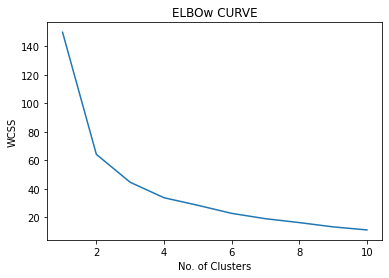

In [17]:
plt.plot(range(1,11),wcss)
plt.title('ELBOw CURVE')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()